# Kuramoto-Shinomoto-Sakaguchi MV-SDE

In primis importiamo i pacchetti necessari per usare le funzioni matematiche in python.

In [94]:
import math
import numpy as np
import matplotlib.pyplot as plt
import time

Scriviamo la MV-SDE relativa al modello di Kuramoto-Shninomoto-Sakaguchi:

$$ dX_t = \left( \mathbb{E}[sen(X_t)] cos(X_t) - \mathbb{E}[cos(X_t)]sen(X_t) \right) dt + \sigma dW_t , \ \ \ X_0=x_0. $$

Da questa equazione differenziale si evince che:
* K = 3, d = 1 e q = 1,
* $\varphi(x)=(1, senx, cosx)$, 
* $\alpha(t,x)=(0, cosx, -senx)^T$, 
* $\beta(t,x)=(\sigma, 0, 0)^T$.

Siamo pronti per definire la prima funzione che applica il Metodo di Eulero a un vettore X preso in input, assieme alle costanti $c_1$ e $c_2$, il valore della parte diffusiva $\sigma$ , il numero di simulazioni M e il valore dello step temporale h.
<a id="eulero"></a>

In [95]:
def eulero(c1, c2, sigma, h, M, X):
    W = np.random.normal(0, 1, M) 
    drift = c1 * np.cos(X) - c2 * np.sin(X) 
    diffusione = sigma 
    X = X + drift * h + diffusione * math.sqrt(h) * W 
    
    return X

Ora definiamo la funzione che calcola la media degli M valori di un vettore preso in input. 
<a id="average"></a>

In [96]:
def average(Y):
    num = Y.size
    X = sum(Y) / num
    return X

Scriviamo la funzione pricipale che implementa il metodo Monte Carlo. Essa calcola il valore h di ogni step e il vettore di valori iniziali, dopodichè richiama ciclicamente il Metodo di Eulero sopra definito, per ogni step temporale.
<a id="montecarlo"></a>

In [97]:
def monte_carlo(c1, c2, a1, a2, sigma, T, N, M, X0):
    h = T / N
    X = X0 * np.ones(M)
    gamma1 = []
    gamma2 = []
    
    for i in range(N):
        gamma1.append(average(np.sin(X)))
        gamma2.append(average(np.cos(X)))
        X = eulero(c1 + a1 * gamma1[-1], c2 + a2 * gamma2[-1], sigma, h, M, X)
    
    return X, np.array(gamma1), np.array(gamma2) 

Concludiamo riportando il main che richiama le funzioni sopra definite. Ricordiamo a cosa corrisponderanno i valori che daremo in input alle funzioni che richiameremo:
* N : numero di iterazioni (steps temporali),
* M : numero di simulazioni in ogni istante,
* T : istante finale,
* $\mu$ : funzione di Drift,
* $\sigma$ : funzione di Diffuzione,
* h : step temporale,
* $X_0$ : dato iniziale.

Precisiamo anche il ruolo che le quattro costanti $c_1, \  c_2, \ a_1$ e $a_2$ hanno all'interno del programma. Esse infatti servono per rendere il metodo applicabile sia al caso di MV-SDE che a quello di SDE Markoviane. Infatti i coefficienti $a_1$ e $a_2$ possono annullare il contributo dipendente dal valore atteso,  all'interno dell'equazione.
<a id="main"></a>

In [98]:
if __name__ == "__main__":
    
    # Parametri in Input
    c1 = 0
    c2 = 0
    a1 = 1
    a2 = 0
    
    sigma = 0.5
    
    T = 1
    N = 1000
    M = 10000
    X0 = 0
    
    start = time.process_time()   # parte il cronometro
    X, gamma1, gamma2 = monte_carlo(c1, c2, a1, a2, sigma, T, N, M, X0)
    end = time.process_time()   # si ferma il cronometro
    
    print("Tempo di esecuzione: ", end - start)

Tempo di esecuzione:  2.140625


In [99]:
print("XT = ", X)

XT =  [-0.20428437  0.30241245 -0.29851352 ...  0.64306071 -0.40050558
 -0.0756318 ]


In [100]:
print("E[sen(X)] = ", gamma1)

E[sen(X)] =  [ 0.00000000e+00  1.17200422e-05 -1.83264344e-04 -4.62050276e-04
 -3.63574368e-04 -5.44998072e-04 -4.89786382e-04 -3.95947795e-04
 -2.62694823e-04 -4.71704310e-04 -3.35267291e-04 -2.44556460e-04
 -5.03349910e-04 -4.48186015e-04 -4.43280828e-04 -3.32751595e-04
 -2.22477529e-04 -3.45197040e-04 -3.66039509e-04 -5.16971094e-04
 -5.00619703e-04 -5.65325966e-04 -5.18481015e-04 -5.22153395e-04
 -5.34314306e-04 -7.91645718e-04 -7.59236884e-04 -9.82718012e-04
 -8.06743090e-04 -1.03182382e-03 -1.05577700e-03 -9.03868883e-04
 -8.41127740e-04 -1.13327219e-03 -1.11660141e-03 -1.34345484e-03
 -1.28483018e-03 -1.34556475e-03 -1.14913453e-03 -1.09790644e-03
 -1.04856494e-03 -9.91000213e-04 -1.02092964e-03 -1.16649214e-03
 -1.28133389e-03 -1.30676132e-03 -1.36903086e-03 -1.63188484e-03
 -1.87214342e-03 -2.23182796e-03 -2.44369137e-03 -2.78323835e-03
 -2.49654556e-03 -2.60441439e-03 -2.44177884e-03 -2.35839490e-03
 -2.35688921e-03 -2.31445213e-03 -2.22686002e-03 -2.17456798e-03
 -2.42004668

In [101]:
print("E[cos(X)] = ", gamma2)

E[cos(X)] =  [1.         0.99987214 0.99974583 0.9996253  0.99950211 0.99938676
 0.99925696 0.99913269 0.99900947 0.99887948 0.99875316 0.99863849
 0.99850875 0.99838769 0.998268   0.99813586 0.99801431 0.99788997
 0.99775783 0.99764886 0.99750941 0.9973843  0.99727585 0.99713711
 0.99702284 0.99688397 0.99673475 0.99661101 0.99647779 0.99636553
 0.99624911 0.99611162 0.99599296 0.99584159 0.99572572 0.99561475
 0.99548299 0.99534836 0.99521078 0.99508564 0.99497702 0.99482662
 0.99470545 0.99459087 0.99442906 0.99434426 0.994228   0.9941202
 0.99399573 0.99385145 0.99372787 0.99358337 0.99344571 0.99332375
 0.99320059 0.99306035 0.99292707 0.99277826 0.99264356 0.99255528
 0.99241718 0.99232624 0.9922214  0.99209932 0.99197036 0.99181093
 0.99170482 0.99157826 0.99146595 0.99133174 0.99121602 0.99108449
 0.99098158 0.9908498  0.99075472 0.99063384 0.99047394 0.99039013
 0.99025163 0.99014492 0.99002068 0.98988991 0.98979638 0.98966132
 0.98952709 0.98943084 0.98929152 0.98913349 0.989

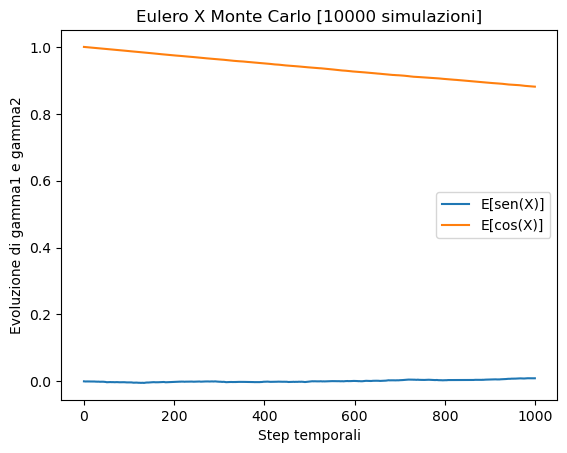

In [105]:
fig = plt.figure() 
plt.title("Eulero X Monte Carlo [" + str(M) + " simulazioni]") 
plt.xlabel("Step temporali") 
plt.ylabel("Evoluzione di gamma1 e gamma2") 
plt.plot(gamma1, label='E[sen(X)]')
plt.plot(gamma2, label='E[cos(X)]')
plt.legend()
plt.show()

[Vai alla funzione eulero](#eulero)

[Vai alla funzione average](#average)

[Vai alla funzione monte carlo](#montecarlo)

[Vai al main](#main)